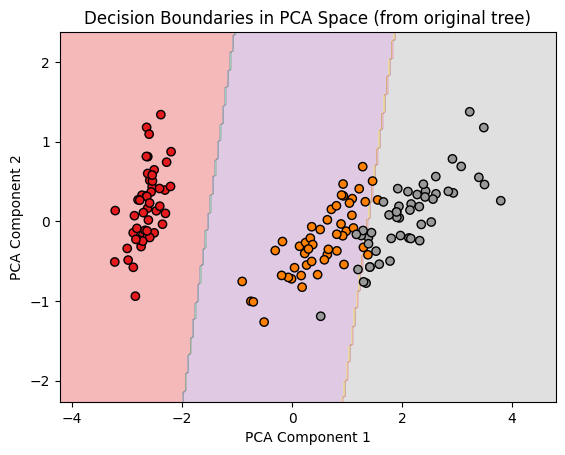

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# Load the iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Train a decision tree on the original data
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

# Apply PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Transform original data into PCA space

# Create a mesh grid in PCA space
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Project grid points back to original space
grid_in_original_space = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])

# Use the original decision tree to predict on the grid
Z = tree.predict(grid_in_original_space)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries in PCA space
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundaries in PCA Space (from original tree)")
plt.show()
